2) assume your result set contains one row per user, and each users’ question category plus their average reported score for that category. Write a python script to show how you would test for correlation between the categories ‘acc’ and ‘nps’. 

You can assume:
•	there are a total of 8 categories
•	Some users may have NA responses to certain categories, which should not be included.


# EXPLORATION

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
h1 = pd.read_csv('housing.csv')

In [184]:
h2.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [185]:
h2 = h1[['MSZoning', 'LotFrontage']]
RL = h2[h2['MSZoning'] == 'RL']['LotFrontage']
RM = h2[h2['MSZoning'] == 'RM']['LotFrontage'].reset_index(drop=True) # drop=True to drop the original index 

In [186]:
def equal_num_rows(cat1, cat2):
    if len(cat1) > len(cat2):
        return len(cat2)
    else:
        return len(cat1)

#### this here is the correalation - it's at 0.19

In [195]:
RL_RM = pd.DataFrame([RM,RL], index=['RM', 'RL']).T
RL_RM.corr()

,RM,RL
RM,1.000000,-0.194789
RL,-0.194789,1.000000


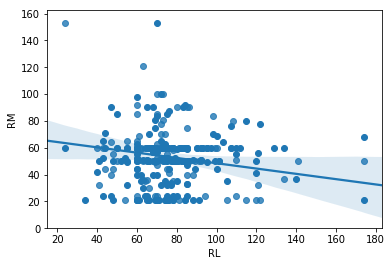

In [196]:
plt.scatter(RL[:equal_num_rows(RM,RL)], RM)
sns.regplot(x='RL',y='RM',data=RL_RM)

#### round 2 test

In [189]:
h1.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [190]:
h2 = h1[['MSZoning', 'LotFrontage']]
RH = h2[h2['MSZoning'] == 'RH']['LotFrontage'].reset_index(drop=True) # drop=True to drop the original index
RM = h2[h2['MSZoning'] == 'RM']['LotFrontage'].reset_index(drop=True)  

In [191]:
def equal_num_rows(cat1, cat2):
    if len(cat1) > len(cat2):
        return len(cat2)
    else:
        return len(cat1)

#### this here is the correlation when tested on another category - at -0.28

In [192]:
RH_RM = pd.DataFrame([RM,RH], index=['RM', 'RH']).T
RH_RM.corr()

,RM,RH
RM,1.000000,-0.281011
RH,-0.281011,1.000000


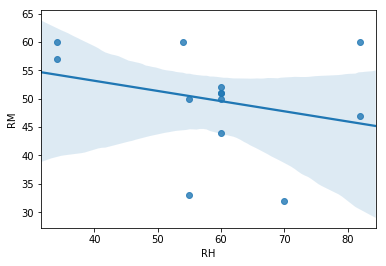

In [194]:
sns.regplot(x='RH',y='RM',data=RH_RM)